# What are the most demanded skills for the top 3 most popular data roles?
## Methodology

    1-Clean-up skill column
    2-Calculate skill count based on job_title_short
    3-Calculate skill percentage
    4-Plot final findings


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset
import seaborn as sns
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

import ast
def string(list_word):
  if pd.notna(list_word):
    return ast.literal_eval(list_word)
df['job_skills'] = df['job_skills'].apply(string)


## Filter Data for the United States

Filter the data for the market of the United States.


In [12]:
df_US = df[df['job_country'] == "United States"]

## Explode Skills
Convert the job_skills column from string-formatted lists into actual list objects, then expand these lists so that each skill appears on its own row. This transformation enables us to display and analyze the job_title and job_skills columns separately, providing a clearer view of skill distribution across various data job titles.


In [13]:
df_skills = df_US.explode('job_skills')

## Count Skills per Job Title

Group the DataFrame by job_skills and job_title_short, counting how often each skill appears within each job title. Then, reset the index to convert the Series back into a DataFrame, renaming the count column to count. The resulting DataFrame, df_skills_count, displays the frequency of each skill for each job title.

In [14]:
df_skills_count  = df_skills.groupby(['job_title_short','job_skills']).size()

In [15]:
df_skills_count  = df_skills_count.reset_index(name = 'skills_count').sort_values(by= 'skills_count',ascending = False)

In [16]:
df_skills_count

,job_title_short,job_skills,skills_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1



## Create List of Top 3 Roles
Focus: Data Analysts, Data Engineers, and Data Scientists

Filter the job titles based on the most popular.


In [17]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

In [18]:
job_titles = sorted(job_titles[0:3])

In [19]:
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']


## Plot Skill Counts

Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.


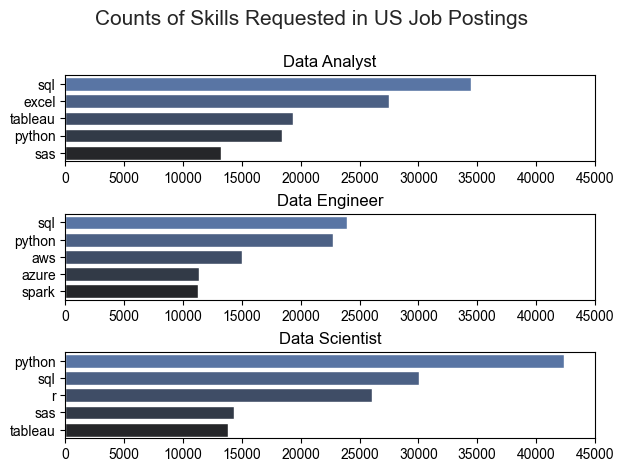

In [20]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style = 'ticks')
for i ,job_title in enumerate(job_titles):
   df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
   sns.barplot(data = df_plot , x='skills_count',y='job_skills',hue = 'job_skills' ,ax = ax[i], palette = 'dark:b_r') 
   ax[i].set_title(job_title)
   ax[i].set_ylabel('')
   ax[i].set_xlabel('')
   ax[i].set_xlim(0,45000)

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

## Convert Counts to Percentages:
Counts alone don’t fully capture how often specific skills are requested across different job titles. To get a clearer picture, we’ll convert these counts into percentages, providing insight into how each job title contributes relative to the entire dataset.

First, we need to determine the total counts for each job title. We’ll calculate the frequency of each job title by applying the value_counts() method to the job_title_short column. Then, we’ll reset the index to transform this Series into a DataFrame, renaming the columns to job_title_short and total. This new DataFrame, df_job_title_count, will now display each job title alongside its total occurrences.

In [21]:
df_job_title_count  = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [22]:
df_skills_perc = pd.merge(df_job_title_count,df_skills_count,how = 'left',on = 'job_title_short')

In [23]:
df_skills_perc['skills_perc'] = df_skills_perc['skills_count']/df_skills_perc['jobs_total']*100

## Plot Percentage Count:

To visualize the data, filter and sort the DataFrame to identify the top 5 skills with the highest percentages for each of the top 3 job roles. Begin by sorting the skills in descending order of percentage. Then, reverse the order of these top 5 skills since horizontal bar plots typically start plotting from the bottom. This ensures the most relevant skills are displayed at the top of the plot.

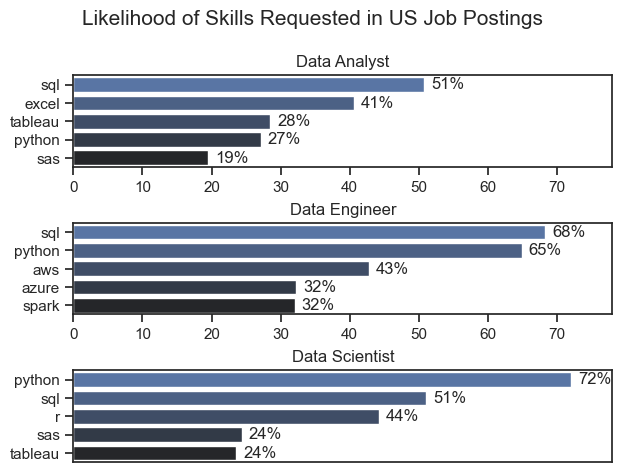

In [26]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style = 'ticks')
for i ,job_title in enumerate(job_titles):
   df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
   sns.barplot(data = df_plot , x='skills_perc',y='job_skills',hue = 'job_skills' ,ax = ax[i], palette = 'dark:b_r') 
   ax[i].set_title(job_title)
   ax[i].set_ylabel('')
   ax[i].set_xlabel('')
   ax[i].set_xlim(0, 78)
   if i == len(job_titles) -1:
     ax[i].set_xticks([])   
    
   for n, v in enumerate(df_plot['skills_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()